Accuracy of Naive Bayes model: 1.0
                                            product_name  product_price Rate  \
0      Home Sizzler 153 cm 502 ft Polyester Room Dark...          299.0    3   
1      CMerchants Multi Organiser BLue4 Book Shelf Me...          625.0    2   
2      RIAN Animal Single Mink Blanket for  Mild Wint...          599.0    5   
3      BAJAJ Crest Neo 1200 mm 3 Blade Ceiling Fan???...         1329.0    4   
4      Lakm?? Eyeconic Kajal Twin Pack??????????(Deep...          218.0    5   
...                                                  ...            ...  ...   
62631  AGARO Regal Hand-held Vacuum CleanerÐÒ?ÐÓ®Ð...         1599.0    5   
62632  cello Pack of 18 Opalware Cello Dazzle Lush Fi...         1299.0    5   
62633  Thomson Alpha 80 cm (32 inch) HD Ready LED Sma...         7999.0    5   
62634  Lakm?? Eyeconic Kajal Twin Pack??????????(Deep...          218.0    4   
62635  Prestige Plus Atlas 750 W Juicer Mixer Grinder...         3249.0    5   

    

C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


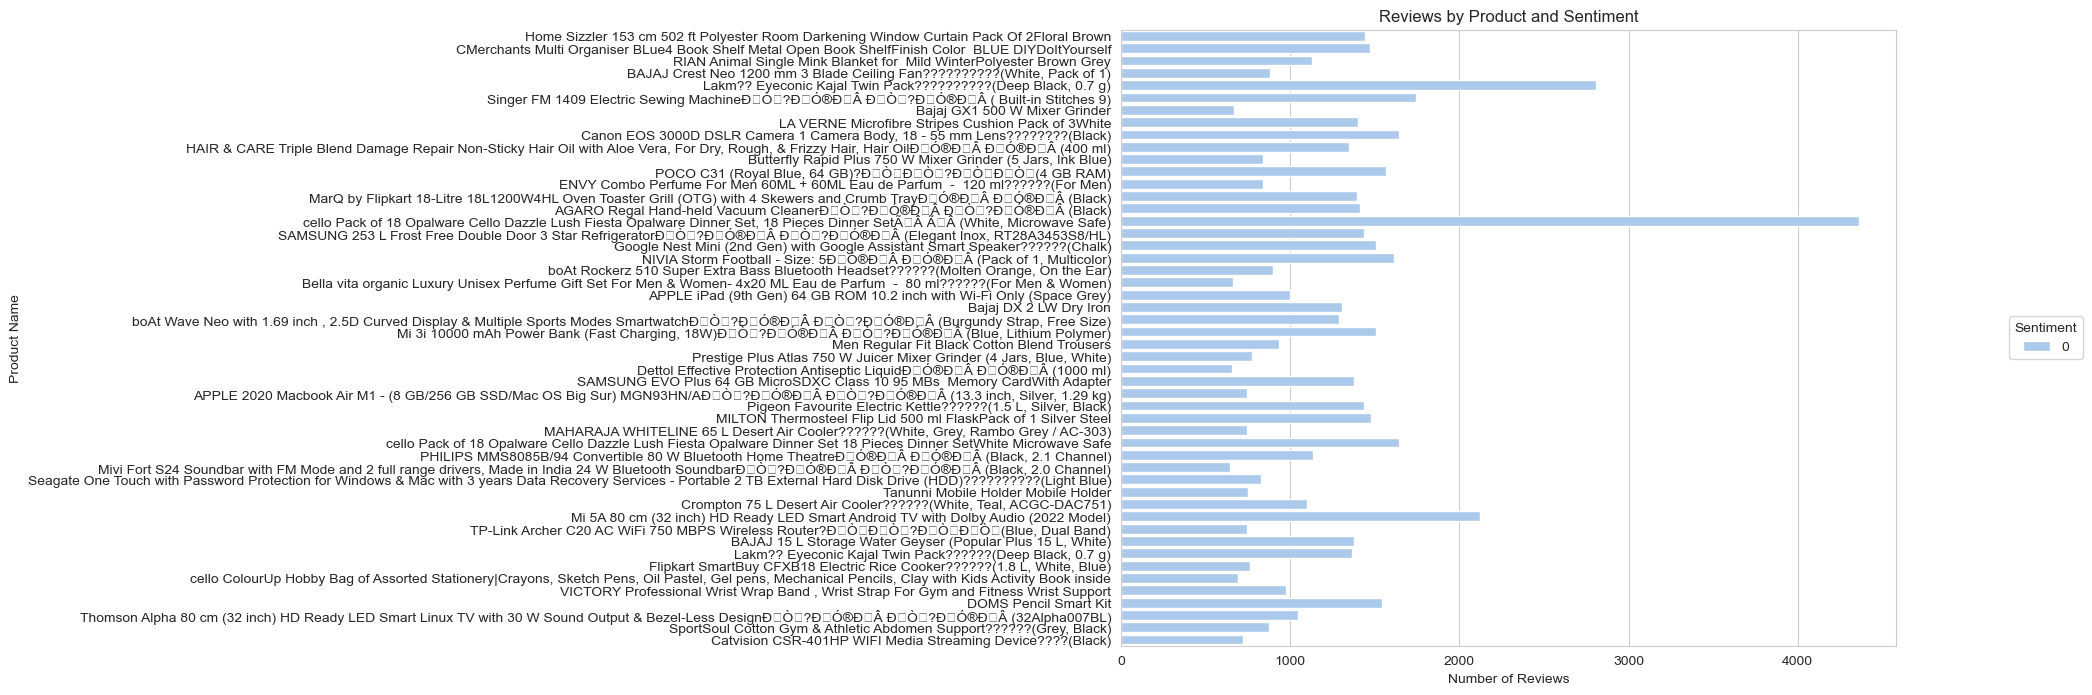

In [2]:
#using naive bays model for sentiment analysis ...

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\nh013\Desktop\flipkart.csv\Dataset-SA.csv")

# Remove any rows with missing values
df.dropna(inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any URLs
df['Review'] = df['Review'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove any special characters
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert all text to lowercase
df['Review'] = df['Review'].apply(lambda x: x.lower())

# Remove stop words
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Apply stemming
stemmer = PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Assign labels to sentiments (positive = 1, negative = 0)
df['Sentiment'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# Add sentiment polarity scores using VADER
sid = SentimentIntensityAnalyzer()
df['Sentiment_Polarity'] = df['Review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Get the top 50 products based on the number of reviews
top_products = df.groupby('product_name').size().nlargest(50).index.tolist()

# Create a new dataframe with only the top products
df_top_products = df[df['product_name'].isin(top_products)]

# Shuffle the rows of the dataframe
df_top_products = df_top_products.sample(frac=1).reset_index(drop=True)

# Convert the product_price column to numeric
df_top_products['product_price'] = pd.to_numeric(df_top_products['product_price'], errors='coerce')

# Define a function to calculate the sentiment polarity of a review
def get_sentiment_polarity(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity

# Apply the function to the Review column to get the sentiment polarity of each review
df_top_products['Sentiment_Polarity'] = df_top_products['Review'].apply(get_sentiment_polarity)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_top_products['Review'], df_top_products['Sentiment'], test_size=0.2)

# Create a count vectorizer object and fit it to the training data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Train a Naive Bayes model on the vectorized data
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

# Use the trained model to predict sentiment on the test data
X_test_vectorized = vectorizer.transform(X_test)
y_pred = nb_model.predict(X_test_vectorized)

# Calculate accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Naive Bayes model:", accuracy)

# Print the resulting dataframe
print(df_top_products)

# Create a grouped bar chart
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.figure(figsize=(10, 8))
sns.countplot(y="product_name", hue="Sentiment", data=df_top_products)
plt.xlabel("Number of Reviews")
plt.ylabel("Product Name")
plt.title("Reviews by Product and Sentiment")
plt.legend(title="Sentiment", loc="center right", bbox_to_anchor=(1.25, 0.5))
plt.show()


In [18]:
# using random forest model predict for best selling product based on review


import pandas as pd
import nltk
import plotly.express as px
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns



# Load the dataset
df = pd.read_csv(r"C:\Users\nh013\Desktop\flipkart.csv\Dataset-SA.csv")

# Remove any rows with missing values
df.dropna(inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any URLs
df['Review'] = df['Review'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove any special characters
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert all text to lowercase
df['Review'] = df['Review'].apply(lambda x: x.lower())

# Remove stop words
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Apply stemming
stemmer = PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Assign labels to sentiments (positive = 1, negative = 0)
df['Sentiment'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# Add sentiment polarity scores using VADER
sid = SentimentIntensityAnalyzer()
df['Sentiment_Polarity'] = df['Review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Get the top 50 products based on the number of reviews
top_products = df.groupby('product_name').size().nlargest(50).index.tolist()

# Create a new dataframe with only the top products
df_top_products = df[df['product_name'].isin(top_products)]

# Shuffle the rows of the dataframe
df_top_products = df_top_products.sample(frac=1).reset_index(drop=True)

# Convert the product_price column to numeric and replace NaN values with mean
df_top_products['product_price'] = pd.to_numeric(df_top_products['product_price'], errors='coerce')
mean_price = df_top_products['product_price'].mean()
df_top_products['product_price'].fillna(mean_price, inplace=True)

# Convert the Rate column to numeric and replace NaN values with mean
df_top_products['Rate'] = pd.to_numeric(df_top_products['Rate'], errors='coerce')
mean_rate = df_top_products['Rate'].mean()
df_top_products['Rate'].fillna(mean_rate, inplace=True)

# Compute the mean of the Rate column for each product
average_rate = df_top_products.groupby('product_name')['Rate'].mean().reset_index()
average_rate.rename(columns={'Rate': 'Average_Rate'}, inplace=True)

# Merge the average_rate dataframe with the best_selling_product dataframe
best_selling_product = df_top_products.groupby('product_name').agg({'product_price': 'mean', 'Sentiment': 'mean', 'Sentiment_Polarity': 'mean', 'Review': 'count'}).reset_index()
best_selling_product.rename(columns={'Review': 'Review Count'}, inplace=True)
best_selling_product.sort_values(by=['Review Count', 'Sentiment_Polarity', 'product_price'], ascending=False, inplace=True)
best_selling_product = pd.merge(best_selling_product, average_rate, on='product_name')

# Define a function to calculate the sentiment polarity of a review
def get_sentiment_polarity(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity

# Apply the function to the Review column to get the sentiment polarity of each review
df_top_products['Sentiment_Polarity'] = df_top_products['Review'].apply(get_sentiment_polarity)

# Define X and y
X = df_top_products[['product_price', 'Sentiment', 'Sentiment_Polarity']]
y = df_top_products['product_name']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Print the resulting dataframes
print(best_selling_product.head())
print(df_top_products)


# Create a bar plot
fig = px.bar(best_selling_product, x='product_name', y=['Sentiment_Polarity', 'Review Count'], 
             barmode='group', color='Average_Rate', 
             labels={'product_name': 'Product Name', 'value': 'Score'})

# Set the title and axis labels
fig.update_layout(title='Sentiment and Review Count by Product', xaxis_title='Product', yaxis_title='Score')

# Show the plot
fig.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.9036558109833972
                                        product_name  product_price  \
0  cello Pack of 18 Opalware Cello Dazzle Lush Fi...         1299.0   
1  Lakm?? Eyeconic Kajal Twin Pack??????????(Deep...          218.0   
2  Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...        13999.0   
3  Singer FM 1409 Electric Sewing MachineÐÒ?ÐÓ...         8499.0   
4  Canon EOS 3000D DSLR Camera 1 Camera Body, 18 ...        30999.0   

   Sentiment  Sentiment_Polarity  Review Count  Average_Rate  
0        0.0            0.245098          4362      4.270518  
1        0.0            0.255085          2805      4.475223  
2        0.0            0.231171          2122      4.131951  
3        0.0            0.244624          1743      4.324727  
4        0.0            0.249800          1646      4.453827  
                                            product_name  product_price  Rate  \
0      Crompton 75 L Desert Air Cooler??????(White, T...         9999.0   4.0   
1   